# Compare Trial Types

The following example shows how to access behavioral and neural data for a given recording session and create plots for different trial types 


Make sure that you have the AllenSDK installed in your environment

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

In [2]:
# Import allenSDK and check the version, which should be >2.10.2
import allensdk
allensdk.__version__

'2.15.1'

In [3]:
# import the behavior ophys project cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

/Users/marinag/anaconda3/envs/allensdk/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the cache and get the ophys experiments metadata table

In [4]:
# Set the path to the dataset
cache_dir = r'/Users/marinag/Documents/Data/VisualBehavior/'
# cache_dir = '/data/'

In [5]:
# If you are working with data in the cloud in Code Ocean, 
# or if you have already downloaded the full dataset to your local machine, 
# you can instantiate a local cache
# cache = VisualBehaviorOphysProjectCache.from_local_cache(cache_dir=cache_dir, use_static_cache=True)

# If you are working with the data locally for the first time, you need to instantiate the cache from S3:
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
          

In [6]:
ophys_experiment_table = cache.get_ophys_experiment_table()                          

## Look at a sample of the experiment table

In [7]:
ophys_experiment_table.sample(5)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
968717808,MESO.1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,477052,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,137.0,Slc17a7-IRES2-Cre,GCaMP6f,5.0,...,1018028037,VisualBehaviorMultiscope4areasx2d,175,VISam,2019-10-16 13:39:06.239820,OPHYS_5_images_H_passive,Novel >1,True,H,1120140478
991852005,MESO.1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,479839,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,171.0,Slc17a7-IRES2-Cre,GCaMP6f,6.0,...,1018028064,VisualBehaviorMultiscope,279,VISl,2019-12-02 08:27:10.948347,OPHYS_6_images_B,Novel >1,False,B,1085399939
905955219,MESO.1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,456915,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,141.0,Slc17a7-IRES2-Cre,GCaMP6f,3.0,...,1018027657,VisualBehaviorMultiscope,75,VISl,2019-07-12 12:22:04.270010,OPHYS_3_images_A,Familiar,False,A,1085398996
993618374,MESO.1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,484631,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,155.0,Slc17a7-IRES2-Cre,GCaMP6f,3.0,...,1022733792,VisualBehaviorMultiscope4areasx2d,265,VISl,2019-12-10 14:56:30.260648,OPHYS_3_images_G,Familiar,False,G,1120141147
984551228,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,480753,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,2.0,...,978206330,VisualBehaviorTask1B,275,VISp,2019-11-15 16:41:39.000000,OPHYS_2_images_B_passive,Familiar,True,B,985812469


### here are all of the unique session types

In [8]:
np.sort(ophys_experiment_table['session_type'].unique())

array(['OPHYS_1_images_A', 'OPHYS_1_images_B', 'OPHYS_1_images_G',
       'OPHYS_2_images_A_passive', 'OPHYS_2_images_B_passive',
       'OPHYS_2_images_G_passive', 'OPHYS_3_images_A', 'OPHYS_3_images_B',
       'OPHYS_3_images_G', 'OPHYS_4_images_A', 'OPHYS_4_images_B',
       'OPHYS_4_images_H', 'OPHYS_5_images_A_passive',
       'OPHYS_5_images_B_passive', 'OPHYS_5_images_H_passive',
       'OPHYS_6_images_A', 'OPHYS_6_images_B', 'OPHYS_6_images_H'],
      dtype=object)

### Select an `OPHYS_1_images_A` experiment at random, load the experiment data

In [9]:
experiment_id = ophys_experiment_table.query('session_type == "OPHYS_1_images_A"').sample(random_state=10).index[0]
print('getting experiment data for experiment_id {}'.format(experiment_id))
ophys_experiment = cache.get_behavior_ophys_experiment(experiment_id)

getting experiment data for experiment_id 946476556


behavior_ophys_experiment_946476556.nwb: 100%|██████████| 1.80G/1.80G [04:24<00:00, 6.81MMB/s]    
/Users/marinag/anaconda3/envs/allensdk/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.3.0 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/Users/marinag/anaconda3/envs/allensdk/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Look at the performance data
We can see that the d-prime metric, a measure of discrimination performance, peaked at 2.14 during this session, indicating mid-range performance.  
(d' = 0 means no discrimination performance, d' is infinite for perfect performance, but is limited to about 4.5 this dataset due to trial count limitations). 

In [10]:
ophys_experiment.get_performance_metrics()

{'trial_count': 489,
 'go_trial_count': 325,
 'catch_trial_count': 48,
 'hit_trial_count': 11,
 'miss_trial_count': 314,
 'false_alarm_trial_count': 4,
 'correct_reject_trial_count': 44,
 'auto_reward_count': 5,
 'earned_reward_count': 11,
 'total_reward_count': 16,
 'total_reward_volume': 0.10200000000000001,
 'maximum_reward_rate': 3.606067930506664,
 'engaged_trial_count': 82,
 'mean_hit_rate': 0.09107934458687789,
 'mean_hit_rate_uncorrected': 0.09030062323224546,
 'mean_hit_rate_engaged': 0.7413614163614164,
 'mean_false_alarm_rate': 0.1831974556974557,
 'mean_false_alarm_rate_uncorrected': 0.16967797967797968,
 'mean_false_alarm_rate_engaged': 0.6666666666666667,
 'mean_dprime': -0.6280628929364763,
 'mean_dprime_engaged': 0.3837839767679964,
 'max_dprime': 0.967421566101701,
 'max_dprime_engaged': 0.967421566101701}

### We can build a trial dataframe that tells us about behavior events on every trial. This can be merged with a rolling performance dataframe, which calculates behavioral performance metrics over a rolling window of 100 trials (excluding aborted trials, or trials where the animal licks prematurely). 

In [11]:
trials_df = ophys_experiment.trials.merge(
    ophys_experiment.get_rolling_performance_df().fillna(method='ffill'), # performance data is NaN on aborted trials. Fill forward to populate.
    left_index = True,
    right_index = True
)

In [12]:
trials_df.head()

,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,is_change,aborted,...,change_time,response_latency,initial_image_name,change_image_name,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
trials_id,,,,,,,,,,,,,,,,,,,,,
0,305.97088,313.22681,"[309.5071, 309.77427, 309.94106, 310.1246, 310...",309.12347,0.005,False,False,False,True,False,...,308.994843,0.512257,im065,im077,NaN,NaN,NaN,NaN,NaN,NaN
1,313.47703,314.66132,"[313.59405, 313.77752, 313.96101, 314.14447, 3...",NaN,0.000,False,False,False,False,True,...,NaN,NaN,im077,im077,NaN,NaN,NaN,NaN,NaN,NaN
2,314.97825,316.36271,"[315.11169, 315.29514, 315.46196, 315.66213, 3...",NaN,0.000,False,False,False,False,True,...,NaN,NaN,im077,im077,NaN,NaN,NaN,NaN,NaN,NaN
3,316.47944,317.46361,"[316.69632, 316.9632, 317.14669, 317.56369]",NaN,0.000,False,False,False,False,True,...,NaN,NaN,im077,im077,NaN,NaN,NaN,NaN,NaN,NaN
4,317.98101,319.91561,"[318.28122, 318.49814, 318.69795, 318.86475, 3...",NaN,0.000,False,False,False,False,True,...,NaN,NaN,im077,im077,NaN,NaN,NaN,NaN,NaN,NaN


### Now we can plot performance over the full experiment duration
Some key observations:
* The hit rate remains high for the first ~46 minutes of the session
* The false alarm rate graduall declines during the first ~25 minutes of the session.
* d' peaks when the hit rate is still high, but the false alarm rate dips
* The hit rate and d' fall off dramatically after ~46 minutes. This is likely due to the animal becoming sated and losing motivation to perform

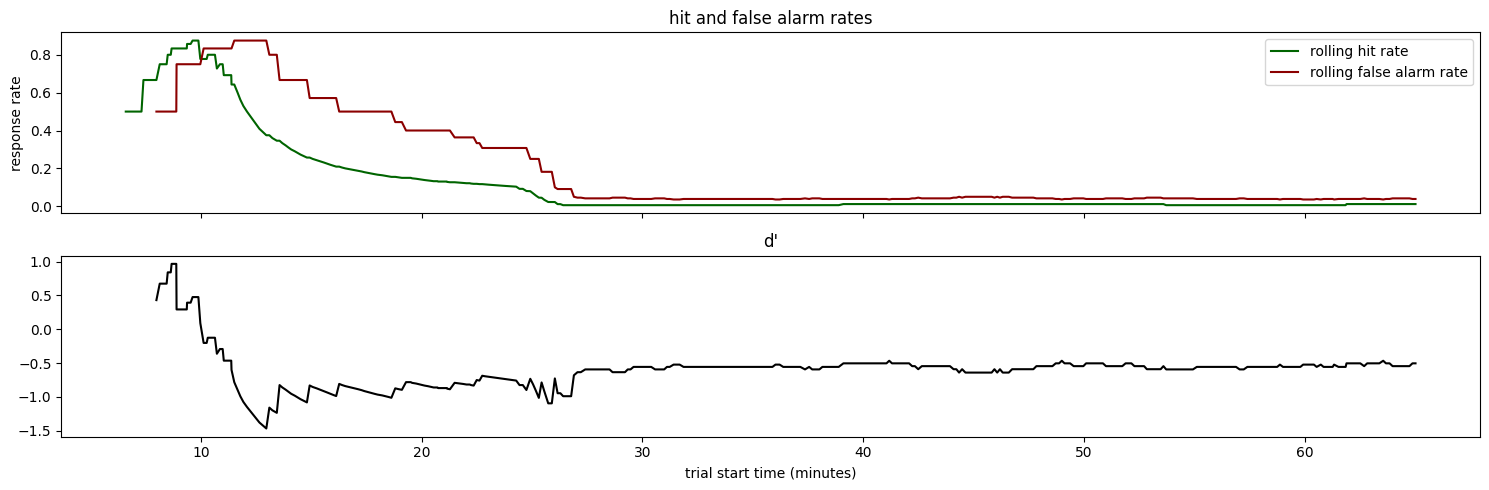

In [13]:
fig, ax = plt.subplots(2, 1, figsize = (15,5), sharex=True)
ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['hit_rate'],
    color='darkgreen'
)

ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['false_alarm_rate'],
    color='darkred'
)

ax[0].legend(['rolling hit rate', 'rolling false alarm rate'])

ax[1].plot(
    trials_df['start_time']/60.,
    trials_df['rolling_dprime'],
    color='black'
)

ax[1].set_xlabel('trial start time (minutes)')
ax[0].set_ylabel('response rate')
ax[0].set_title('hit and false alarm rates')
ax[1].set_title("d'")

fig.tight_layout()

## We can also look at a dataframe of stimulus presentations. This tells us the attributes of every stimulus that was shown in the session

In [14]:
stimulus_presentations = ophys_experiment.stimulus_presentations
stimulus_presentations.head()

,duration,end_frame,flashes_since_change,image_index,image_name,is_change,omitted,start_frame,start_time,end_time
stimulus_presentations_id,,,,,,,,,,
0,0.25022,18001.0,0.0,0,im065,False,False,17986,305.98756,306.23778
1,0.25000,NaN,0.0,8,omitted,False,True,18030,306.72150,306.97150
2,0.25021,18091.0,1.0,0,im065,False,False,18076,307.48881,307.73902
3,0.25019,18136.0,2.0,0,im065,False,False,18121,308.23943,308.48962
4,0.25021,18181.0,0.0,1,im077,True,False,18166,308.99001,309.24022


#### Also note that there is an image name called 'omitted'. This represents the time that a stimulus would have been shown, had it not been omitted from the regular stimulus cadence. They are included here for ease of analysis, but it's important to note that they are not actually stimuli. They are the lack of expected stimuli.

In [15]:
stimulus_presentations.query('image_name == "omitted"').head()

,duration,end_frame,flashes_since_change,image_index,image_name,is_change,omitted,start_frame,start_time,end_time
stimulus_presentations_id,,,,,,,,,,
1,0.25,NaN,0.0,8,omitted,False,True,18030,306.72150,306.97150
12,0.25,NaN,7.0,8,omitted,False,True,18525,314.97825,315.22825
33,0.25,NaN,1.0,8,omitted,False,True,19470,330.74111,330.99111
42,0.25,NaN,9.0,8,omitted,False,True,19875,337.49660,337.74660
66,0.25,NaN,6.0,8,omitted,False,True,20955,355.51131,355.76131


#### For plotting purposes below, let's add a column that specifies a unique color for every unique image

In [16]:
unique_stimuli = [stimulus for stimulus in stimulus_presentations['image_name'].unique() if stimulus != 'omitted']
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = np.nan # assign gray to omitted
colormap

{'im061': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im062': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im063': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im065': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im066': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im069': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im077': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im085': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'omitted': nan}

In [17]:
stimulus_presentations['color'] = stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

### There are also dataframes containing running speed, licks, eye tracking, and neural data:

#### running speed
One entry for each read of the analog input line monitoring the encoder voltage, polled at ~60 Hz.

In [18]:
ophys_experiment.running_speed.head()

,timestamps,speed
0,5.97684,0.022645
1,5.99360,2.234085
2,6.01018,4.367226
3,6.02686,6.337823
4,6.04354,8.063498


#### licks
One entry for every detected lick onset time, assigned the time of the corresponding visual stimulus frame.

In [19]:
ophys_experiment.licks.head()

,timestamps,frame
0,8.44550,148
1,10.09646,247
2,50.69616,2681
3,50.94637,2696
4,72.69742,4000


#### eye tracking data
One entry containing ellipse fit parameters for the eye, pupil and corneal reflection for every frame of the eye tracking video stream.

In [20]:
ophys_experiment.eye_tracking.head()

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,...,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,
0,0.42068,208.304081,66690.199475,14852.461632,False,14852.461632,208.304081,66690.199475,313.893949,275.783870,...,331.879196,267.942025,162.943138,130.279495,0.055473,331.518456,267.277981,64.946794,68.758166,0.487738
1,0.43153,211.683443,67246.531870,14894.844884,False,14894.844884,211.683443,67246.531870,314.648703,274.890199,...,333.166388,267.938712,162.592435,131.649642,0.049750,332.149275,267.294598,66.021009,68.856201,0.455899
2,0.44081,213.529562,67260.825064,14763.415717,False,14763.415717,213.529562,67260.825064,314.224868,274.586975,...,332.547380,267.146070,162.991558,131.355181,0.038800,331.494585,266.882232,65.201056,68.551741,0.448700
3,0.47454,197.017497,67003.186733,14861.325140,False,14861.325140,197.017497,67003.186733,313.137500,276.562338,...,332.315725,268.699396,162.297228,131.411836,0.043076,330.827633,269.505806,65.011954,68.778679,0.540266
4,0.49075,184.506202,66531.120928,14813.194293,False,14813.194293,184.506202,66531.120928,312.833888,276.887232,...,331.257388,269.569497,162.378660,130.420546,0.042803,330.691566,269.404159,65.289862,68.667213,0.227099


#### and deltaF/F values
One row per cell, with each containing an array of deltaF/F values.

In [21]:
ophys_experiment.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086677732,1080782769,"[0.19445239017441418, 0.12601236314041633, 0.1..."
1086677737,1080782784,"[0.20871294449813774, 0.3277438520090626, 0.14..."
1086677746,1080782868,"[0.2461564600926237, 0.2061539632478795, 0.183..."
1086677771,1080782948,"[0.23367534487212552, 0.22006350260557936, 0.2..."
1086677774,1080782973,"[1.1538649539919354, 0.5792651430717506, 0.386..."


#### we can convert the dff_traces to long-form (aka "tidy") as follows:

In [22]:
def get_cell_timeseries_dict(dataset, cell_specimen_id):
    '''
    for a given cell_specimen ID, this function creates a dictionary with the following keys
    * timestamps: ophys timestamps
    * cell_roi_id
    * cell_specimen_id
    * dff
    This is useful for generating a tidy dataframe
    arguments:
        session object
        cell_specimen_id
    returns
        dict
    '''
    cell_dict = {
        'timestamps': dataset.ophys_timestamps,
        'cell_roi_id': [dataset.dff_traces.loc[cell_specimen_id]['cell_roi_id']] * len(dataset.ophys_timestamps),
        'cell_specimen_id': [cell_specimen_id] * len(dataset.ophys_timestamps),
        'dff': dataset.dff_traces.loc[cell_specimen_id]['dff'],

    }
    return cell_dict

ophys_experiment.tidy_dff_traces = pd.concat(
    [pd.DataFrame(get_cell_timeseries_dict(ophys_experiment, cell_specimen_id)) for cell_specimen_id in ophys_experiment.dff_traces.reset_index()['cell_specimen_id']]
).reset_index(drop=True)

ophys_experiment.tidy_dff_traces.sample(5)

,timestamps,cell_roi_id,cell_specimen_id,dff
20702193,3515.09786,1080788380,1086676912,0.068096
6025457,51.72608,1080783992,1086678170,0.040951
49940963,2207.53642,1080796392,1086677294,-0.013636
32557467,1816.87750,1080792625,1086679879,-0.041362
37163005,1251.39269,1080793986,1086680157,-0.004218


We can look at a few trials in some detail
First define a function to plot a number of data streams

    each stimulus as a colored vertical bar
    running speed
    licks/rewards
    pupil area
    neural responses (dF/F)

In [23]:
def plot_stimuli(trial, ax):
    '''
    plot stimuli as colored bars on specified axis
    '''
    stimuli = stimulus_presentations.query('end_time >= {} and start_time <= {} and not omitted'.format(float(trial['start_time']), float(trial['stop_time'])))
    for idx, stimulus in stimuli.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus['color'], alpha=0.5)

        
def plot_running(trial, ax):
    '''
    plot running speed for trial on specified axes
    '''
    trial_running_speed = ophys_experiment.running_speed.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_running_speed['timestamps'],
        trial_running_speed['speed'],
        color='black'
    )
    ax.set_title('running speed')
    ax.set_ylabel('speed (cm/s)')
    

def plot_licks(trial, ax):
    '''
    plot licks as black dots on specified axis
    '''
    trial_licks = ophys_experiment.licks.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_licks['timestamps'],
        np.zeros_like(trial_licks['timestamps']),
        marker = 'o',
        linestyle = 'none',
        color='black'
    )
    

def plot_rewards(trial, ax):
    '''
    plot rewards as blue diamonds on specified axis
    '''
    trial_rewards = ophys_experiment.rewards.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_rewards['timestamps'],
        np.zeros_like(trial_rewards['timestamps']),
        marker = 'd',
        linestyle = 'none',
        color='blue',
        markersize = 10,
        alpha = 0.25
    )
    
def plot_pupil(trial, ax):
    '''
    plot pupil area on specified axis
    '''
    trial_eye_tracking = ophys_experiment.eye_tracking.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_eye_tracking['timestamps'],
        trial_eye_tracking['pupil_area'],
        color='black'
    )
    ax.set_title('pupil area')
    ax.set_ylabel('pupil area\n')
    

def plot_dff(trial, ax):
    '''
    plot each cell's dff response for a given trial
    '''
    trial_dff_traces = ophys_experiment.tidy_dff_traces.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    for cell_specimen_id in ophys_experiment.tidy_dff_traces['cell_specimen_id'].unique():
        ax.plot(
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['timestamps'],
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['dff']
        )
        ax.set_title('deltaF/F responses')
        ax.set_ylabel('dF/F')
    
def make_trial_plot(trial):
    '''
    combine all plots for a given trial
    '''
    fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

    for ax in axes:
        plot_stimuli(trial, ax)
            
    plot_running(trial, axes[0])

    plot_licks(trial, axes[1])
    plot_rewards(trial, axes[1])
    
    axes[1].set_title('licks and rewards')
    axes[1].set_yticks([])
    axes[1].legend(['licks','rewards'])

    plot_pupil(trial, axes[2])

    plot_dff(trial, axes[3])
    
    axes[3].set_xlabel('time in session (seconds)')
    fig.tight_layout()
    return fig, axes

### here is a hit trial
Notes:
* The image identity changed just after t = 2361 seconds (note the color change in the vertical spans)
* The animal was running steadily prior to the image change, then slowed to a stop after the change
* The first lick occured about 500 ms after the change, and triggered an immediate reward
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There appears to be one neuron that was responding regularly to the stimulus prior to the change. 

In [24]:
stimulus_presentations.columns

Index(['duration', 'end_frame', 'flashes_since_change', 'image_index',
       'image_name', 'is_change', 'omitted', 'start_frame', 'start_time',
       'end_time', 'color'],
      dtype='object')

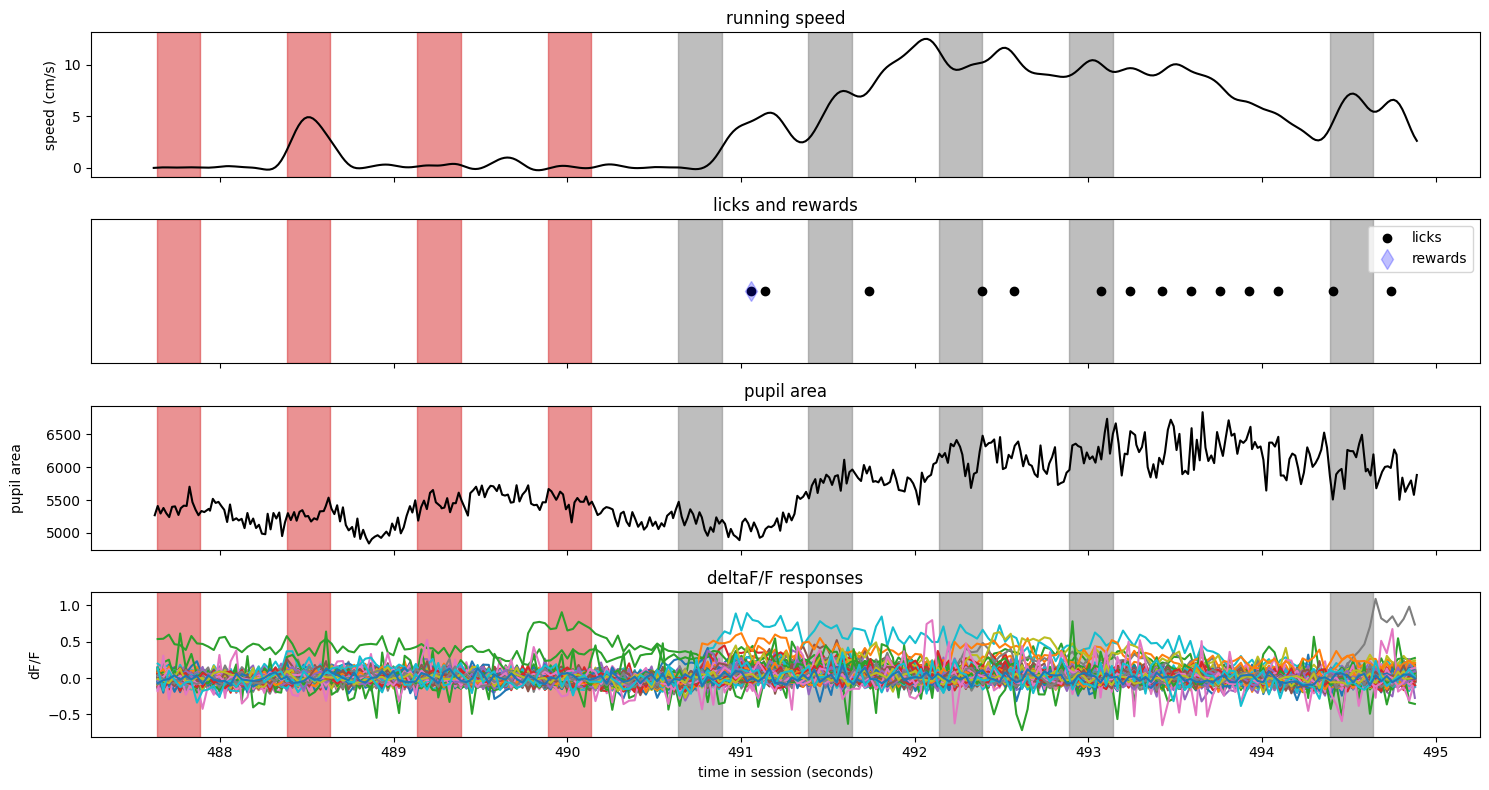

In [25]:
trial = ophys_experiment.trials.query('hit').sample(random_state = 1)
fig, axes = make_trial_plot(trial)

### here is a miss trial
Notes:
* The image identity changed just after t = 824 seconds (note the color change in the vertical spans)
* The animal was running relatively steadily during the entire trial and did not slow after the stimulus identity change
* There were no licks or rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* One neuron had a large response just prior to the change, but none appear to be stimulus locked on this trial

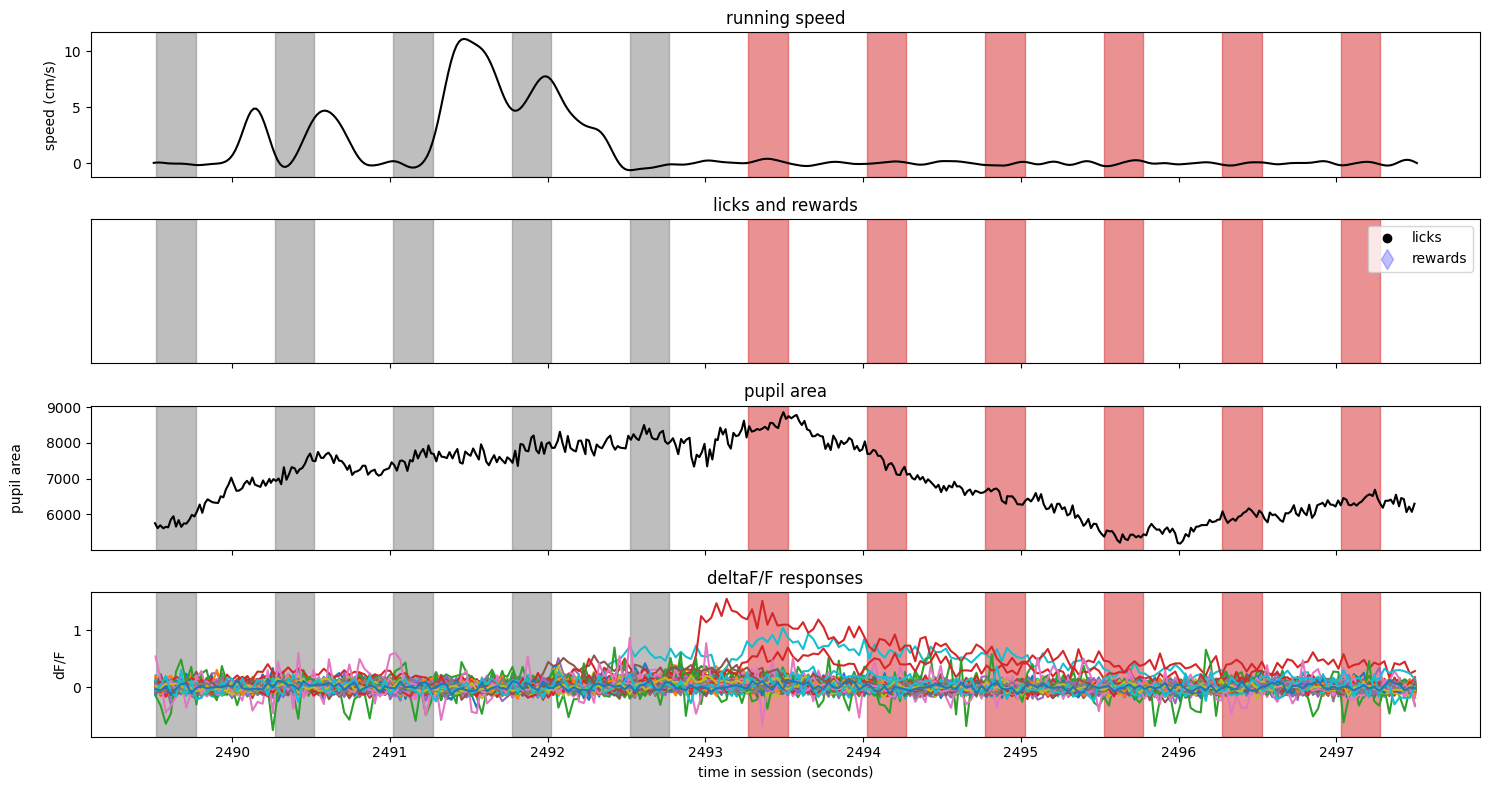

In [26]:
trial = ophys_experiment.trials.query('miss').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### here is a false alarm trial
Notes:
* The image identity was consistent during the entire trial
* The animal slowed and licked partway through the trial
* There were no rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There were not any neurons with obvious stimulus locked responses

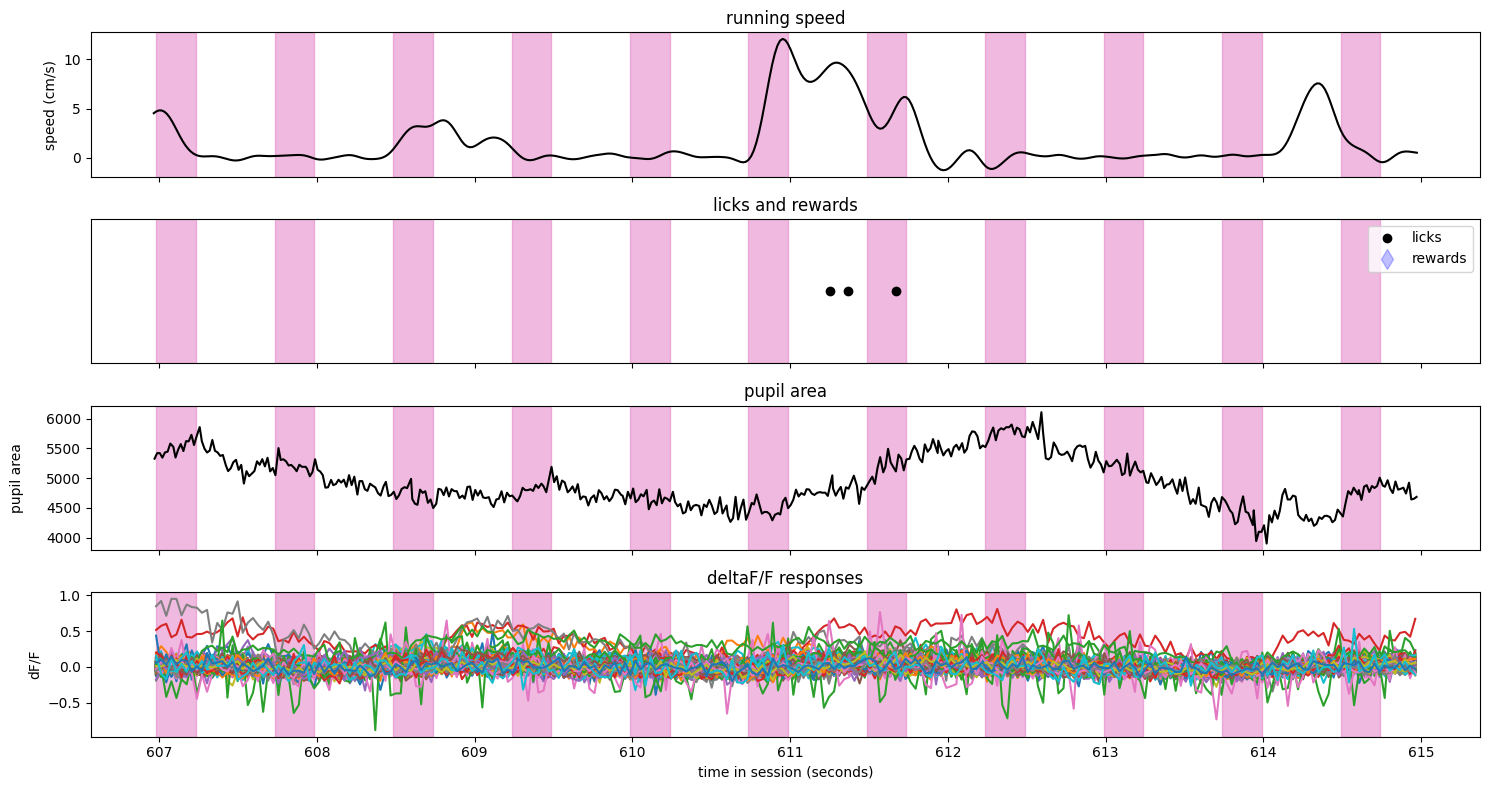

In [27]:
trial = ophys_experiment.trials.query('false_alarm').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### And finally, a correct rejection
Notes:
* The image identity was consistent during the entire trial
* The animal did not slow or lick during this trial
* There were no rewards on this trial

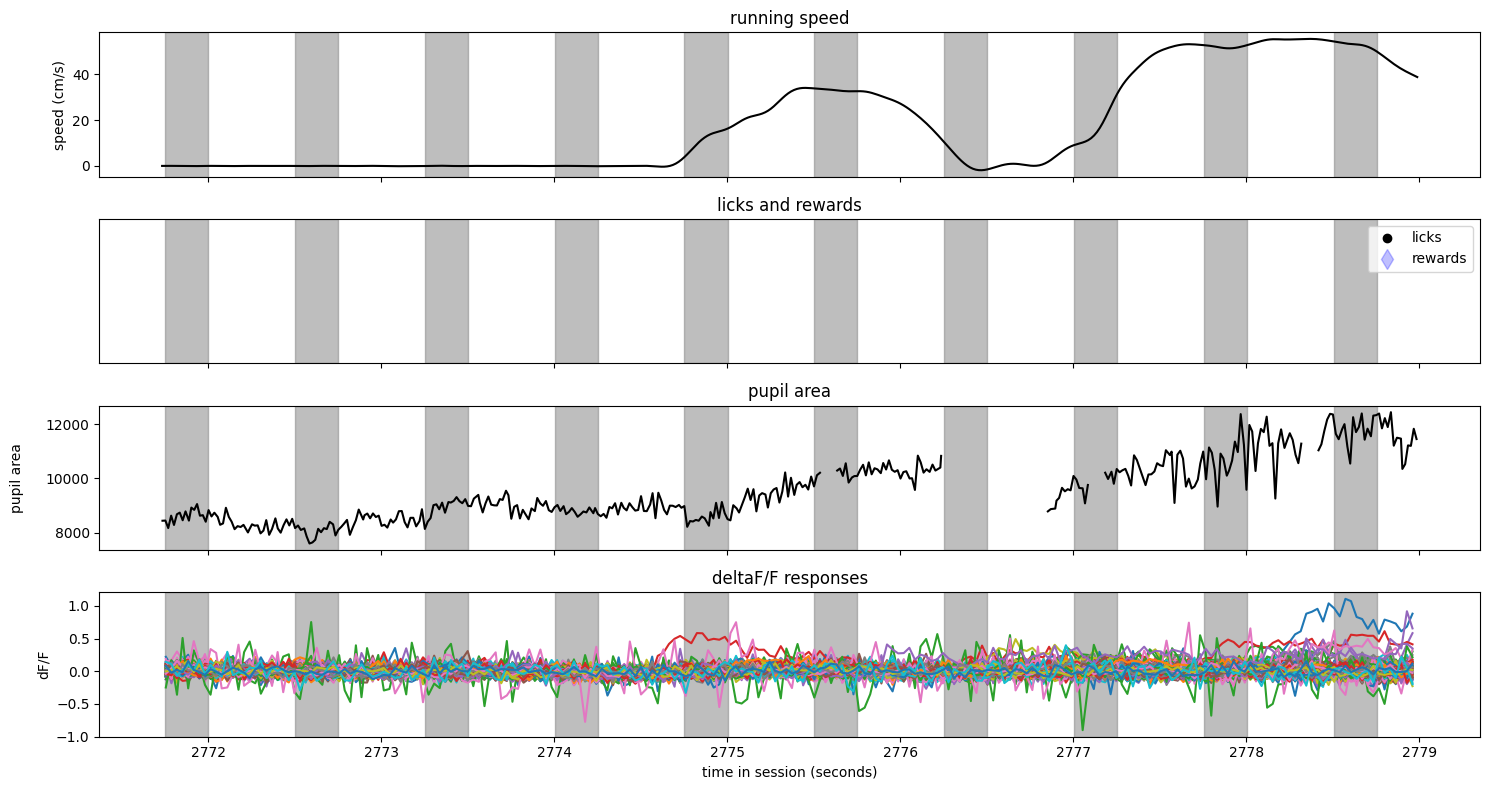

In [28]:
trial = ophys_experiment.trials.query('correct_reject').sample(random_state = 10)
fig, axes = make_trial_plot(trial)